#### ▶ set connection for crypto coin data from coinmarketcap.com site by using API
       ※ API : Application Program Interface 
       (role as intermediary between tow different applications, servers & clients)

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b030a4cc-ef49-42d4-a5ee-55231f56c1bc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-16T14:03:11.807Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 9956}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11046, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)    # json file is dictionary-type data

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### ▶ . json_normalize( ) to pull out data from jaon file

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-05-16T14:03:11.807Z,0,None,12,1,None,9956


#### ▶ a new column appended into the dataframe

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')    # timestamp column with datetime function

df

C:\Users\comra\AppData\Local\Temp\ipykernel_13040\1530526145.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')    # timestamp column with datetime function


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969908e+07,1.969908e+07,False,NaN,1,NaN,NaN,None,2024-05-16T14:02:00.000Z,66353.267833,3.703688e+10,19.0182,0.494075,3.416384,8.439075,5.874509,-1.032623,26.540029,1.307098e+12,54.7910,1.393419e+12,None,2024-05-16T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
1,1027,Ethereum,ETH,ethereum,8936,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201184e+08,1.201184e+08,True,NaN,2,NaN,NaN,None,2024-05-16T14:01:00.000Z,2981.618863,1.421022e+10,5.7997,0.063512,1.029588,0.302438,-2.791009,-16.456992,4.863659,3.581473e+11,15.0188,3.581473e+11,None,2024-05-16T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
2,825,Tether USDt,USDT,tether,85685,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-16T14:01:00.000Z,1.000217,6.983625e+10,15.2134,-0.030699,0.032674,0.067362,-0.036523,0.127387,-0.029001,1.109763e+11,4.6537,1.131110e+11,None,2024-05-16T14:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-16 14:04:03.233315
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-16T14:01:00.000Z,578.005678,1.997798e+09,-4.0499,0.246041,0.137025,-2.565467,7.612704,1.153668,59.269088,8.530586e+10,3.5773,8.530586e+10,None,2024-05-16T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.487745e+08,5.761722e+08,True,NaN,5,NaN,NaN,None,2024-05-16T14:01:00.000Z,162.943384,3.844718e+09,27.9123,0.691295,7.762349,14.066665,23.530204,-15.509450,45.020447,7.312484e+10,3.0665,9.388346e+10,None,2024-05-16T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
5,3408,USDC,USDC,usd-coin,19148,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331710e+10,3.331710e+10,False,NaN,6,NaN,NaN,None,2024-05-16T14:01:00.000Z,0.999893,7.870033e+09,22.9283,-0.016379,0.004573,-0.005904,-0.033638,-0.025757,-0.009226,3.331354e+10,1.3970,3.331354e+10,None,2024-05-16T14:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-16 14:04:03.233315
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-16T14:02:00.000Z,0.517039,1.146731e+09,3.1203,0.325201,1.715965,0.992372,6.255876,-15.910798,-9.219832,2.862283e+10,1.1998,5.170385e+10,None,2024-05-16T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474189e+09,5.106672e+09,True,NaN,8,3.414167e+09,2.300107e+10,None,2024-05-16T14:01:00.000Z,6.736949,6.839726e+08,74.6711,1.217037,-3.704229,12.081673,9.287377,80.894156,206.502674,2.340544e+10,0.9815,3.440339e+10,None,2024-05-16T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:04:03.233315
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.4

#### ▶ creating the function to automate for connection, creating dataframe and csv file 

In [6]:
def api_runner():
    
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b030a4cc-ef49-42d4-a5ee-55231f56c1bc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv'):
        df.to_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv', mode='a', header=False)
        

#### ▶ executing the function every 60 sec by for loop
       - when the function is executed first time, csv file is created and data
         is appended to that file in every 60 sec

In [7]:
import os
from time import time
from time import sleep

In [8]:
for i in range(99):
    api_runner()
    print('api_runner() completed')
    sleep(60)
exit()

C:\Users\comra\AppData\Local\Temp\ipykernel_13040\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_13040\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_13040\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_13040\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_13040\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


KeyboardInterrupt: 

In [9]:
df2 = pd.read_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv')

df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969908e+07,1.969908e+07,False,NaN,1,NaN,NaN,NaN,2024-05-16T14:04:00.000Z,66400.037038,3.694150e+10,18.6467,0.674684,3.559701,8.401361,6.183583,-1.042356,26.863990,1.308020e+12,54.8297,1.394401e+12,NaN,2024-05-16T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
1,1,1027,Ethereum,ETH,ethereum,8936,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201184e+08,1.201184e+08,True,NaN,2,NaN,NaN,NaN,2024-05-16T14:03:00.000Z,2986.496123,1.411792e+10,5.6355,0.304853,1.355671,0.409013,-2.495243,-16.273441,5.272744,3.587332e+11,15.0374,3.587332e+11,NaN,2024-05-16T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
2,2,825,Tether USDt,USDT,tether,85685,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-16T14:03:00.000Z,1.000461,6.951876e+10,14.7595,-0.000354,0.023680,0.105866,0.012952,0.156480,0.000708,1.110034e+11,4.6530,1.131387e+11,NaN,2024-05-16T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-16 14:05:28.965654
3,3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,NaN,2024-05-16T14:03:00.000Z,578.130458,1.989506e+09,-3.1082,0.291755,0.198980,-2.613889,7.949070,1.141301,59.254453,8.532427e+10,3.5766,8.532427e+10,NaN,2024-05-16T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.487745e+08,5.761722e+08,True,NaN,5,NaN,NaN,NaN,2024-05-16T14:03:00.000Z,162.977217,3.818171e+09,27.7145,0.830294,7.919519,13.980470,23.851317,-15.427099,45.237483,7.314002e+10,3.0659,9.390295e+10,NaN,2024-05-16T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
5,5,3408,USDC,USDC,usd-coin,19148,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.331710e+10,3.331710e+10,False,NaN,6,NaN,NaN,NaN,2024-05-16T14:03:00.000Z,1.000058,7.832530e+09,22.4848,-0.001964,-0.014059,0.025116,-0.002497,-0.006451,-0.005815,3.331903e+10,1.3967,3.331903e+10,NaN,2024-05-16T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-16 14:05:28.965654
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-16T14:04:00.000Z,0.517214,1.144805e+09,2.9246,0.377717,1.862253,0.875871,6.500290,-15.896063,-9.127969,2.863255e+10,1.2002,5.172142e+10,NaN,2024-05-16T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
7,7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474189e+09,5.106672e+09,True,NaN,8,3.414167e+09,2.300327e+10,NaN,2024-05-16T14:03:00.000Z,6.737595,6.796121e+08,73.6404,1.204338,-3.631225,12.057708,9.325991,81.003399,206.526306,2.340768e+10,0.9812,3.440669e+10,NaN,2024-05-16T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 14:05:28.965654
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha.

#### ▶ standardizing columns by regular expression

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                               'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.46832,3.26868,8.08298,5.76367,-1.04882,26.73657
Ethereum,0.28143,1.19838,0.18573,-2.73475,-16.26431,5.48364
Tether USDt,0.02030,0.05056,0.10789,0.01670,0.17754,0.00626
BNB,0.43169,0.21091,-2.72325,7.91697,1.22005,59.11551
Solana,1.17815,7.78022,13.82306,24.11930,-15.23836,45.66908
USDC,0.01354,0.01100,0.01834,0.00238,0.01165,0.01221
XRP,0.37171,1.79574,0.78120,6.32124,-15.84470,-9.07276
Toncoin,0.36737,-3.76133,11.72998,9.37169,79.99277,206.08768
Dogecoin,0.33126,1.21372,3.33369,1.28403,2.71649,76.48108


#### ▶ apply . stack( ) to convert as pivot

In [12]:
df4 = df3.stack()

df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.46832
              quote.USD.percent_change_24h     3.26868
              quote.USD.percent_change_7d      8.08298
              quote.USD.percent_change_30d     5.76367
              quote.USD.percent_change_60d    -1.04882
              quote.USD.percent_change_90d    26.73657
Ethereum      quote.USD.percent_change_1h      0.28143
              quote.USD.percent_change_24h     1.19838
              quote.USD.percent_change_7d      0.18573
              quote.USD.percent_change_30d    -2.73475
              quote.USD.percent_change_60d   -16.26431
              quote.USD.percent_change_90d     5.48364
Tether USDt   quote.USD.percent_change_1h      0.02030
              quote.USD.percent_change_24h     0.05056
              quote.USD.percent_change_7d      0.10789
              quote.USD.percent_change_30d     0.01670
              quote.USD.percent_change_60d     0.17754
              quote.US

#### ▶ as . stack( ) produce series, convert it into dataframe by . to_frame( )

In [13]:
df5 = df4.to_frame(name='values')

df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.46832
             quote.USD.percent_change_24h   3.26868
             quote.USD.percent_change_7d    8.08298
             quote.USD.percent_change_30d   5.76367
             quote.USD.percent_change_60d  -1.04882
             quote.USD.percent_change_90d  26.73657
Ethereum     quote.USD.percent_change_1h    0.28143
             quote.USD.percent_change_24h   1.19838
             quote.USD.percent_change_7d    0.18573
             quote.USD.percent_change_30d  -2.73475
             quote.USD.percent_change_60d -16.26431
             quote.USD.percent_change_90d   5.48364
Tether USDt  quote.USD.percent_change_1h    0.02030
             quote.USD.percent_change_24h   0.05056
             quote.USD.percent_change_7d    0.10789
             quote.USD.percent_change_30d   0.01670
             quote.USD.percent_change_60d   0.17754
             quote.USD.percent_change_90d   0.00626
BNB          quote.USD.percent_change_1h    0.43169
             quote.USD.percent_change_24h   0.21091
             quote.USD.percent_change_7d   -2.72325
             quote.USD.percent_change_30d   7.91697
             quote.USD.percent_change_60d   1.22005
             quote.USD.percent_change_90d  59.11551
Solana       quote.USD.percent_change_1h    1.17815
             quote.USD.percent_change_24h   7.78022
             quote.USD.percent_change_7d   13.82306
             quote.USD.percent_change_30d  24.11930
             quote.USD.percent_change_60d -15.23836
             quote.USD.percent_change_90d  45.66908
USDC         quote.USD.percent_change_1h    0.01354
             quote.USD.percent_change_24h   0.01100
             quote.USD.percent_change_7d    0.01834
             quote.USD.percent_change_30d   0.00238
             quote.USD.percent_change_60d   0.01165
             quote.USD.percent_change_90d   0.01221
XRP          quote.USD.percent_change_1h    0.37171
             quote.USD.percent_change_24h   1.79574
             quote.USD.percent_change_7d    0.78120
             quote.USD.percent_change_30d   6.32124
             quote.USD.percent_change_60d -15.84470
             quote.USD.percent_change_90d  -9.07276
Toncoin      quote.USD.percent_change_1h    0.36737
             quote.USD.percent_change_24h  -3.76133
             quote.USD.percent_change_7d   11.72998
             quote.USD.percent_change_30d   9.37169
             quote.USD.percent_change_60d  79.99277
             quote.USD.percent_change_90d 206.08768
Dogecoin     quote.USD.percent_change_1h    0.33126
             quote.USD.percent_change_24h   1.21372
             quote.USD.percent_change_7d    3.33369
             quote.USD.percent_change_30d   1.28403
             quote.USD.percent_change_60d   2.71649
             quote.USD.percent_change_90d  76.48108
Cardano      quote.USD.percent_change_1h    0.54974
             quote.USD.percent_change_24h   2.75045
             quote.USD.percent_change_7d    0.75637
             quote.USD.percent_change_30d   0.05867
             quote.USD.percent_change_60d -32.64291
             quote.USD.percent_change_90d -24.82268
Shiba Inu    quote.USD.percent_change_1h    0.21334
             quote.USD.percent_change_24h   3.28400
             quote.USD.percent_change_7d    9.66600
             quote.USD.percent_change_30d  11.01965
             quote.USD.percent_change_60d  -8.54193
             quote.USD.percent_change_90d 148.14644
Avalanche    quote.USD.percent_change_1h    0.93225
             quote.USD.percent_change_24h   1.74869
             quote.USD.percent_change_7d    1.88852
             quote.USD.percent_change_30d   2.08336
             quote.USD.percent_change_60d -37.29616
             quote.USD.percent_change_90d -15.32251
TRON         quote.USD.percent_change_1h    0.00918
             quote.USD.percent_change_24h  -0.48309
             quote.USD.percent_change_7d   -0.81774
             quote.USD.percent_change_30d

#### ▶ set new index & set new column name

In [14]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.46832
1,Bitcoin,quote.USD.percent_change_24h,3.26868
2,Bitcoin,quote.USD.percent_change_7d,8.08298
3,Bitcoin,quote.USD.percent_change_30d,5.76367
4,Bitcoin,quote.USD.percent_change_60d,-1.04882
5,Bitcoin,quote.USD.percent_change_90d,26.73657
6,Ethereum,quote.USD.percent_change_1h,0.28143
7,Ethereum,quote.USD.percent_change_24h,1.19838
8,Ethereum,quote.USD.percent_change_7d,0.18573
9,Ethereum,quote.USD.percent_change_30d,-2.73475


In [15]:
df7 = df6.rename(columns={'level_1': 'percent_change'})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.46832
1,Bitcoin,quote.USD.percent_change_24h,3.26868
2,Bitcoin,quote.USD.percent_change_7d,8.08298
3,Bitcoin,quote.USD.percent_change_30d,5.76367
4,Bitcoin,quote.USD.percent_change_60d,-1.04882
5,Bitcoin,quote.USD.percent_change_90d,26.73657
6,Ethereum,quote.USD.percent_change_1h,0.28143
7,Ethereum,quote.USD.percent_change_24h,1.19838
8,Ethereum,quote.USD.percent_change_7d,0.18573
9,Ethereum,quote.USD.percent_change_30d,-2.73475


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',
                                                       'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d', 
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d', 
                                                       'quote.USD.percent_change_90d'],
                                                      ['1h', '24h', '7d', '30d', '60d', '90'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.46832
1,Bitcoin,24h,3.26868
2,Bitcoin,7d,8.08298
3,Bitcoin,30d,5.76367
4,Bitcoin,60d,-1.04882
5,Bitcoin,90,26.73657
6,Ethereum,1h,0.28143
7,Ethereum,24h,1.19838
8,Ethereum,7d,0.18573
9,Ethereum,30d,-2.73475


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

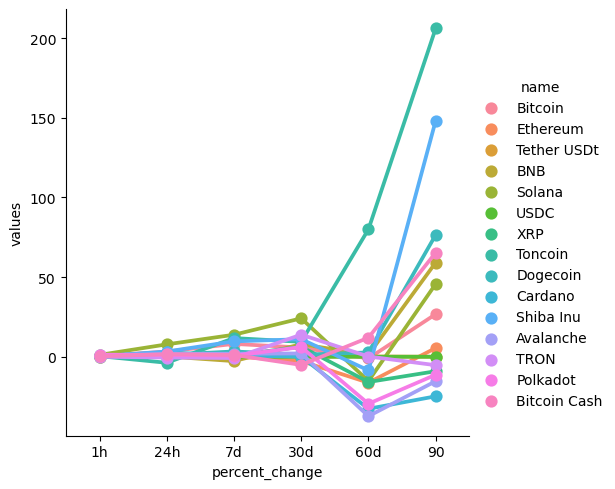

In [18]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [19]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,66400.03704,2024-05-16 14:05:28.965654
15,Bitcoin,66379.72579,2024-05-16 14:06:29.126073
30,Bitcoin,66342.05269,2024-05-16 14:07:29.297204
45,Bitcoin,66203.64832,2024-05-16 14:08:29.494204
60,Bitcoin,66044.22919,2024-05-16 14:09:29.684869


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

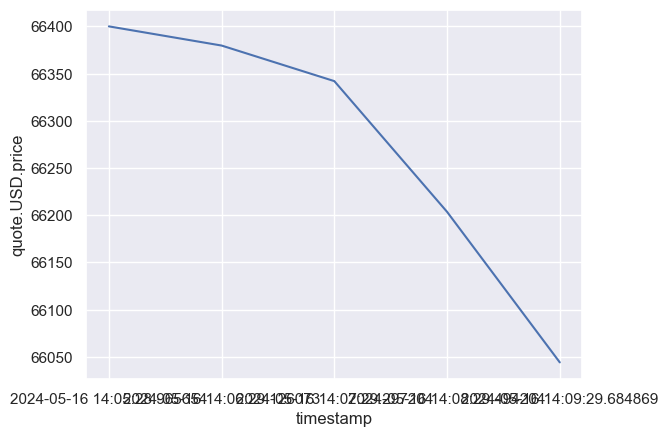

In [20]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)